In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
iowa_data = pd.read_csv("/nas/dft/ire/dhevir/State_of_Iowa_Salary_Book.csv")

In [27]:
# quick glimpse of data
iowa_data.head()

,Fiscal Year,Department,Agency/Institution,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Travel & Subsistence
0,2007,"Administrative Services, Department of",NaN,ABELS BEVERLY J,F,POLK,ADVANCED PERSONNEL MGMT,31.62 HR,07/01/2007 12:00:00 AM,$6462.34,NaN
1,2007,"Administrative Services, Department of",NaN,ABRAMS JERRY A,M,WAPELLO,EARLY OUT POSITION,TERMINATED,07/01/2007 12:00:00 AM,$4242.82,NaN
2,2007,"Administrative Services, Department of",NaN,ADAMS CAROL L,F,MITCHELL,ADVANCED PERSONNEL MGMT,"2,212.80 BW",07/01/2007 12:00:00 AM,$55065.60,$924.44
3,2007,"Administrative Services, Department of",NaN,ADAMS JEANNIE R,F,POLK,ACCOUNTING TECHNICIAN 2,"1,226.40 BW",07/01/2007 12:00:00 AM,$30800.83,$6.80
4,2007,"Administrative Services, Department of",NaN,ADAMS NED J,M,POLK,EARLY OUT POSITION,TERMINATED,07/01/2007 12:00:00 AM,$10634.33,NaN


In [28]:
# 665,325 rows and 11 columns
iowa_data.shape

(665325, 11)

In [29]:
# parse salary paid field
iowa_data["Total Salary Paid"] = iowa_data["Total Salary Paid"].replace('[\$]', '', regex=True).astype(float)

In [30]:
# let's look at some summary statistics on the salary paid field
# note that:
# - we're missing some data (count is less than row count)
# - there are negative values
iowa_data["Total Salary Paid"].describe()

count    6.646900e+05
mean     4.994664e+04
std      4.624053e+04
min     -5.726300e+02
25%      2.593123e+04
50%      4.653680e+04
75%      6.316587e+04
max      5.075000e+06
Name: Total Salary Paid, dtype: float64

In [31]:
# potentially bad data points
iowa_data[iowa_data["Total Salary Paid"] < 0]

,Fiscal Year,Department,Agency/Institution,Name,Gender,Place of Residence,Position,Base Salary,Base Salary Date,Total Salary Paid,Travel & Subsistence
122113,2008,University of Iowa,NaN,"TOWNE,ANGELA JO",F,OBRIEN,Staff Nurse,NaN,07/01/2008 12:00:00 AM,-572.63,$36.25
176062,2009,University of Iowa,NaN,"LIU,CHEN",M,HUDSON,Scholar/Trainee,NaN,07/01/2009 12:00:00 AM,-500.00,$198.50


In [32]:
# let's drop the negative salaries
iowa_data = iowa_data[iowa_data["Total Salary Paid"] >= 0]

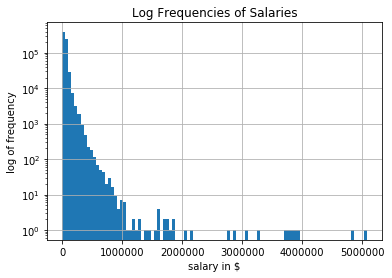

In [33]:
# and plot a histogram of the salaries
salaries = iowa_data["Total Salary Paid"].dropna()
n, bins, patches = plt.hist(salaries, bins=100, log=True)

plt.xlabel("salary in $")
plt.ylabel("log of frequency")
plt.title("Log Frequencies of Salaries")
plt.grid(True)
plt.show()

In [34]:
# looks like we should also normalize the Gender column (e.g. M should be the same as m)
set(iowa_data["Gender"])

{nan, 'FM', 'm', 'U', 'M', '*', 'F'}

In [35]:
def gender_func(val):
    if type(val) is not str:
        return 'unknown'
    lower_cased = val.lower()
    if lower_cased == 'm' or lower_cased == 'f':
        return lower_cased
    else:
        return 'unknown'
    
iowa_data["Gender"] = iowa_data["Gender"].apply(gender_func)

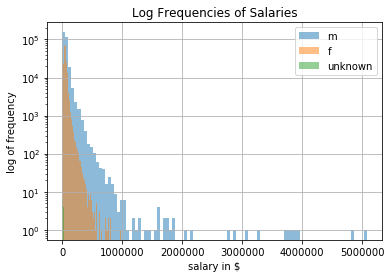

In [36]:
n, bins, patches = plt.hist(iowa_data[iowa_data["Gender"] == 'm']["Total Salary Paid"].dropna(), alpha=0.5, label='m', bins=100, log=True)
n, bins, patches = plt.hist(iowa_data[iowa_data["Gender"] == 'f']["Total Salary Paid"].dropna(), alpha=0.5, label='f', bins=100, log=True)
n, bins, patches = plt.hist(iowa_data[iowa_data["Gender"] == 'unknown']["Total Salary Paid"].dropna(), alpha=0.5, label='unknown', bins=100, log=True)

plt.xlabel("salary in $")
plt.ylabel("log of frequency")
plt.title("Log Frequencies of Salaries")
plt.legend()
plt.grid(True)
plt.show()


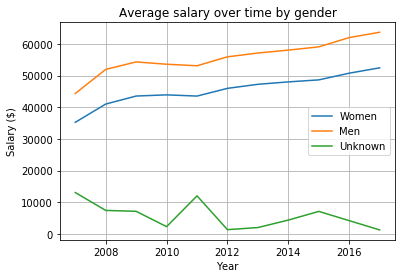

In [39]:
# Use year column to plot average salaries over time for m, f, unknown
avg_grouped = iowa_data.groupby(["Fiscal Year", "Gender"]).mean()
avg_data = avg_grouped.reset_index()

f_avgs = avg_data[avg_data["Gender"] == 'f']
plt.plot(f_avgs["Fiscal Year"], f_avgs["Total Salary Paid"], label='Women')
m_avgs = avg_data[avg_data["Gender"] == 'm']
plt.plot(m_avgs["Fiscal Year"], m_avgs["Total Salary Paid"], label='Men')
u_avgs = avg_data[avg_data["Gender"] == 'unknown']
plt.plot(u_avgs["Fiscal Year"], u_avgs["Total Salary Paid"], label='Unknown')
plt.legend()
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Salary ($)")
plt.title("Average salary over time by gender")
plt.show()